# Welcome To The Hands On Experience On A Simple Neural Network With Deep Learning (For Image Classifications)

All Literature about PyTorch could be found at [PyTorch](http://pytorch.org/) -http://pytorch.org

###### **To Slides: What is tensor

In [1]:
#This is how you can comment in jupyter

#Following two commands are needed only if you run your python codes in jupyter notebooks.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Now we import needed packages
import numpy as np  # does all the numerical calculations 
import torch
import matplotlib.pyplot as plt #library easy to plot a matrix into a graphical plot
from torch import nn #neural network module 
from torch import optim # for the optimization 
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

 ##### **** Let's start making a convolutional neural network 

There are many datasets available in Torch Vision

A list of such databases are given in --> https://pytorch.org/docs/stable/torchvision/datasets.html

In [2]:
# Define a transform image augmentation to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])


# Download and load the training data
#We need to define a set and loader. The set defines training validating and test sets and it's boundaries. 
#Loaders actually load data into the memory.
trainset = datasets.CIFAR10('data', download=True, train=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
#Define your classes 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

##### Converting an images to a Tensor file and Numpy and 

In [4]:
#itterate function to go through pictures
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [5]:
labels

tensor([9, 4, 2, 5, 3, 0, 6, 0, 7, 9, 2, 1, 8, 6, 6, 5, 6, 5, 2, 3, 7, 8, 1, 6,
        1, 0, 9, 1, 4, 7, 9, 0, 5, 7, 8, 8, 6, 8, 0, 3, 9, 9, 8, 0, 3, 5, 3, 2,
        6, 0, 3, 1, 4, 9, 1, 4, 2, 4, 1, 4, 9, 5, 1, 2])

In [6]:
images

tensor([[[[ 0.9686,  0.9294,  0.9294,  ...,  0.7176,  0.6863,  0.6941],
          [ 0.9765,  0.8980,  0.7569,  ...,  0.7490,  0.7255,  0.7255],
          [ 0.9373,  0.7255,  0.2549,  ...,  0.7569,  0.7098,  0.7176],
          ...,
          [ 0.2392,  0.0588,  0.0667,  ...,  0.1216,  0.1294,  0.1451],
          [ 0.0824,  0.1294,  0.2235,  ...,  0.1451,  0.1294,  0.1294],
          [ 0.3569,  0.3725,  0.4039,  ...,  0.1373,  0.1059,  0.1059]],

         [[ 0.9451,  0.8980,  0.8824,  ...,  0.7098,  0.6784,  0.6863],
          [ 0.9529,  0.8510,  0.6941,  ...,  0.7412,  0.7176,  0.7176],
          [ 0.9137,  0.6627,  0.1529,  ...,  0.7412,  0.7020,  0.7098],
          ...,
          [ 0.0196, -0.1843, -0.2000,  ..., -0.1843, -0.1765, -0.1608],
          [-0.1529, -0.1294, -0.0588,  ..., -0.1608, -0.1765, -0.1765],
          [ 0.0902,  0.0745,  0.0902,  ..., -0.1608, -0.2000, -0.2000]],

         [[ 1.0000,  0.9373,  0.9059,  ...,  0.7725,  0.7412,  0.7490],
          [ 1.0000,  0.8824,  

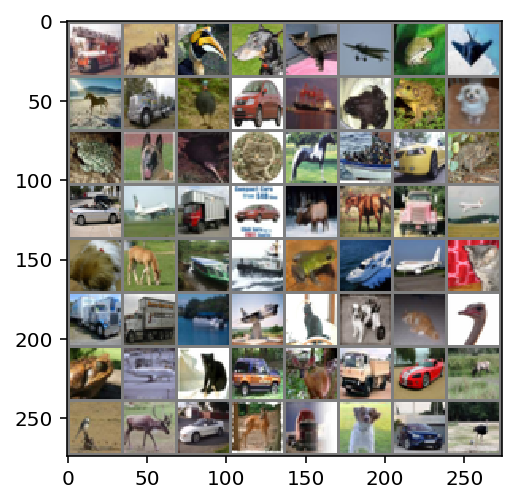

truck  deer  bird   dog   cat plane  frog plane horse truck


In [7]:
#To convert a Tensor to a numpy thereby to visualize the image...
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images in a grid 
imshow(torchvision.utils.make_grid(images))

# print respective labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

###### Let's define a Convolutional Neural Network

In [8]:

class myNeuralNetwork(nn.Module):
    def __init__(self):
        super(myNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.relu1=nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


myNeuralNetwork = myNeuralNetwork()

In [9]:
print(myNeuralNetwork)

myNeuralNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU(inplace)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myNeuralNetwork.parameters(), lr=0.001)

In [11]:
#Train the network
#epoch is Means an itterator. 

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #this is how to write a for loop in python. 
                                              #simillar to i;i=0;i++ in c++ or java.
            
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Now we do the training.
        #1. First goes the forward pass. Get the output.
        #we difine a loss function (so as to calculate how much far is the predicted from the actual)
        #2. Then the output is compared against the actual.
        #3. THen the backward propergation is made to optimize the parameters to get a minimum loss.
        #Minimum loss means the prediction is so close to the actual label.        
        outputs = myNeuralNetwork(inputs)
        loss = criterion(outputs, labels)
        loss.backward()     
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


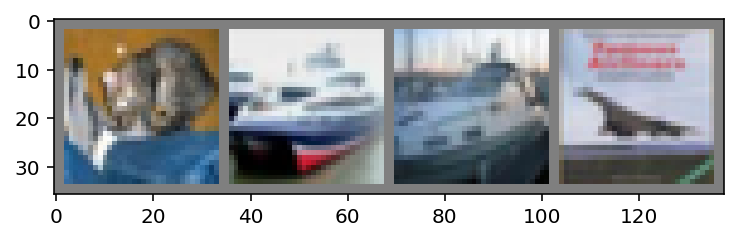

GroundTruth:    cat  ship  ship plane


In [12]:
#Now the training is done. 
#Let's test on test data.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
#machine learning prediction
outputs = myNeuralNetwork(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   cat   dog   dog


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = myNeuralNetwork(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy for 10,000 images is: %d %%' % (
    100 * correct / total))

Accuracy for 10,000 images is: 10 %


In [15]:
?torch.no_grad

In [16]:
predicted

tensor([5, 5, 5, 5])

That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = myNeuralNetwork(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat : 16 %
Accuracy of  deer :  1 %
Accuracy of   dog : 53 %
Accuracy of  frog :  8 %
Accuracy of horse : 24 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %
